In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

import pickle
import numpy as np
import os

import matplotlib.pyplot as plt

from osgeo import gdal
from sklearn import metrics
import pandas as pd

# A list of "random" colors (for a nicer output)
COLORS = ["#000000", "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941"]

### import data from other notebook

pick = r'C:\Users\charl\Documents\GOST\Georgia\pickle'

with open(os.path.join(pick, 'data_all_{}.pickle'.format(city)), 'rb') as handle:
    data_all = pickle.load(handle)
    
with open(os.path.join(pick, 'label_all_{}.pickle'.format(city)), 'rb') as handle:
    label_all = pickle.load(handle)
    
data = pd.DataFrame(data_all.T)

data['class'] = label_all

# Calculate NDVI

# 8-band (0:Coastal, 1:Blue, 2:Green, 3:Yellow, 4:Red, 5:Red-edge, 6:NIR1, 7:NIR2) Multispectral

# ndvi = (nir - red)/(nir + red)

# EVI = 2.5 * ( nir - red ) / ( nir + 6.5 * red - 7.5 * blue+ 1.0 )

data['ndvi'] = (data[6] - data[4])/(data[6] + data[4])

data['EVI'] = 2.5 * (data[6] - data[4]) / (data[6] + 6.5 * data[4] - 7.5 * data[1] + 1 )

data['water_index'] = (data[7] - data[0]) / (data[7] + data[0])



X = data.iloc[:,0:8]

y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# initialize search space (as a library!)
param_grid = {
    
}

gs = make_pipeline(     StandardScaler(), 
                        GridSearchCV(RandomForestClassifier(min_samples_leaf=2),
                        param_grid = param_grid,
                        cv = 2,
                        refit = True,
                        n_jobs = 1,
                        verbose = 2))

# Instantiate random forest. You can specify default parameters here.
# These parameters are not being optimized.

# initialize grid search
#gs = GridSearchCV(rf, param_grid, verbose=2)#,scoring='roc_auc')

gs.fit(X_train,y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV]  ................................................................
[CV] ................................................. , total= 3.6min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.7min remaining:    0.0s


[CV] ................................................. , total= 3.7min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  7.5min finished


Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('gridsearchcv', GridSearchCV(cv=2, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=N...   pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2))])

In [55]:

y_pred = gs.predict(X_test)

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        1.0       0.99      1.00      0.99   3461101
        2.0       0.82      0.73      0.77     87046
        3.0       0.99      0.91      0.94    160866
        4.0       0.85      0.84      0.85     71089

avg / total       0.98      0.98      0.98   3780102



# predict


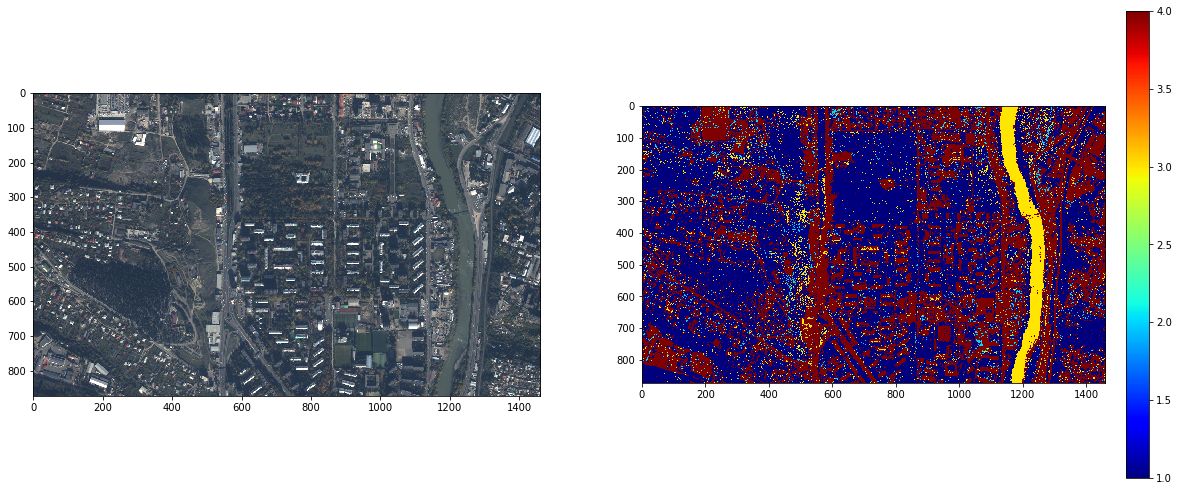